<a href="https://colab.research.google.com/github/79AceVo/Text-analytics/blob/main/Complete_NLP_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up and download data

In [1]:
import pandas as pd
import numpy as np
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bs4 import BeautifulSoup


In [3]:
# 1️⃣ Load the dataset (Replace with actual dataset)
df = pd.read_csv("Data/email_classification.csv")


In [ ]:
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [ ]:
len(df) # we have 179 emails

179

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

# Text Cleaning

In [ ]:
# Convert labels to binary (1 = spam, 0 = ham)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# 2️⃣ Simple Text Cleaning: Remove HTML tags
def clean_text(text):
    return BeautifulSoup(text, "html.parser").get_text()

df['text'] = df['email'].apply(clean_text)

In [ ]:
df.head()

,email,label,text
0,Upgrade to our premium plan for exclusive acce...,0,Upgrade to our premium plan for exclusive acce...
1,Happy holidays from our team! Wishing you joy ...,0,Happy holidays from our team! Wishing you joy ...
2,We're hiring! Check out our career opportuniti...,0,We're hiring! Check out our career opportuniti...
3,Your Amazon account has been locked. Click her...,1,Your Amazon account has been locked. Click her...
4,Your opinion matters! Take our survey and help...,0,Your opinion matters! Take our survey and help...


In [ ]:
df['text'][0]

'Upgrade to our premium plan for exclusive access to premium content and features.'

In [ ]:
df['text'][3]

'Your Amazon account has been locked. Click here to verify your account information.'

# Text Preprocessing - Transforming text to numbers

In [ ]:
# 3️⃣ Create Bag of Words (BoW) representation
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # remove stop words, Limit features to 5000 words
X = vectorizer.fit_transform(df['text'])


## Stop Words

Stop words are common words in a language (like "the", "is", "and", "in") that do not carry much meaning. We will remove it to make our bags of words smaller.

For SKlearn you can use the stop words directly in the vectorizer.

If you want to use others' stop words, then you can import the list and remove the words from each sentence

there are several NLP processor, so many different lists of stop words

### SkLearn stop words

In [ ]:
#display stopwords in sklearn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert to sorted list for better readability
stopwords_list = sorted(list(ENGLISH_STOP_WORDS))

# Print the first 20 stopwords as a sample
print("Total Stopwords in Sklearn:", len(stopwords_list))
print("Sample Stopwords:", stopwords_list[:20])

Total Stopwords in Sklearn: 318
Sample Stopwords: ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst']


### NTLK Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') #need to download this pre-trained data for using with word tokenizer
from nltk.tokenize import word_tokenize
stop_words_nltk = list(stopwords.words('english')) #define English as the stop words
print("Total Stopwords in NLTK:", len(stop_words_nltk))
print("Sample Stopwords:", stop_words_nltk[:20])

Total Stopwords in NLTK: 179
Sample Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Spacy Stop words

In [ ]:
#let's try with another package, spacy
from spacy.lang.en.stop_words import STOP_WORDS #import stop words
import spacy
spacy_model = spacy.load('en_core_web_sm') #set a model for Spacy
stopwords_spacy = spacy_model.Defaults.stop_words #create a list of stop words
print("Total Stopwords in NLTK:", len(stopwords_spacy))
print("Sample Stopwords:", list(stopwords_spacy)[:20])


Total Stopwords in NLTK: 326
Sample Stopwords: ['whoever', 'mine', 'whereas', 'had', 'without', 'towards', 'again', 'will', 'take', 'show', 'done', 'its', 'and', 'between', 'after', 'you', 'ca', 'latter', 'doing', 'eight']


In [ ]:
a = ["I", "love", "pizza", "and", "taco", "and" , "pasta"]

In [ ]:
sw = ["and","or"]

In [ ]:
[ x for x in a  if x not in sw]

['I', 'love', 'pizza', 'taco', 'pasta']

## Examine the DTM Matrix

In [ ]:
X

<179x425 sparse matrix of type '<class 'numpy.int64'>'
	with 1212 stored elements in Compressed Sparse Row format>

so after we vectorize, we have a Document Term Matrix (DTM) X with 179 rows  ( = 179 emails) and 425 columns (425 terms)

In [ ]:
#let's take a look at the first row.

# To read it, we need to transform the Matrix to an array, another mathematical representation

# Convert to an array for readability
X_array = X.toarray()

# Get feature names ( / terms)
feature_names = vectorizer.get_feature_names_out()

# Print vocabulary
print("Vocabulary / Terms (Features):")
print(feature_names)

# Print the vectorized form of the first sentence
print("\nFirst Sentence Vector: ", df['text'][0])
print(X_array[0])  # First sentence in vector form

# Convert to a dictionary for better readability
vector_dict = dict(zip(feature_names, X_array[0]))
print("\nWord Frequency in First Sentence:")
print(vector_dict)


Vocabulary / Terms (Features):
['50' 'access' 'account' 'achieve' 'achievement' 'achievements' 'act'
 'activate' 'activity' 'added' 'advance' 'affiliate' 'amazon'
 'anniversary' 'announce' 'annual' 'antivirus' 'anytime' 'app' 'appeal'
 'apply' 'appreciate' 'appreciation' 'approved' 'asap' 'assist'
 'assistance' 'attached' 'attending' 'await' 'balance' 'ban' 'bank'
 'banned' 'based' 'benefits' 'better' 'big' 'blog' 'bonus' 'browsing'
 'business' 'buy' 'car' 'card' 'career' 'careers' 'cash' 'celebrating'
 'chance' 'change' 'changing' 'channels' 'charged' 'charges' 'chat'
 'check' 'chosen' 'claim' 'click' 'club' 'code' 'collaborations'
 'collection' 'committed' 'company' 'compromised' 'computer' 'concerns'
 'confirm' 'confirmation' 'confirmed' 'congratulations' 'connected'
 'contact' 'content' 'continue' 'continued' 'credit' 'credited' 'cruise'
 'current' 'customer' 'daily' 'day' 'days' 'dear' 'delivered' 'delivery'
 'demand' 'designer' 'details' 'detected' 'difference' 'difficulties'
 'd

As you can see, a sentence will consist of lots of 0 and few 1s. If ther eare repeated words, the count will be higher

## Vector calculation and efficiency

All the sentences have different number of words, why the DTM has the same number of terms? The reason is that it makes computer calculation much more efficient.

Once you have the same vector with the same size, it is quicker to do calculation. No need for loop. Loop will take much longer since we go row by row. Vector calculation is performed through the whole vector.

Hhere is an example with a dot product (multiplication) with another vector


In [ ]:
# Vectorized Calculation: Dot product with a random vector
random_vector = np.random.randint(0, 1, size=X_array.shape[1])

In [ ]:
%%timeit
#magic function time it provide you with several runs with the time

vectorized_result = np.dot(X_array, random_vector)


99 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
loop_result = []
for row in X_array:
    dot_product = sum(row[i] * random_vector[i] for i in range(len(row)))  # Dot product using a loop
    loop_result.append(dot_product)

24.5 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Let's calculate one result
# 1. Vectorized Calculation (Using lambda function with map)
start_time = time.time()
vectorized_result = np.dot(X_array, random_vector)
vectorized_time = time.time() - start_time

In [ ]:

# 2. Loop Calculation: Adding 1 to each element
start_time = time.time()
loop_result = []
for row in X_array:
    dot_product = sum(row[i] * random_vector[i] for i in range(len(row)))  # Dot product using a loop
    loop_result.append(dot_product)
loop_time = time.time() - start_time

In [ ]:
#time increase
percentage_change = (loop_time -vectorized_time) / vectorized_time *100
print(f"Percentage change between loop_time and vectorized_time: {percentage_change:.2f}%")

Percentage change between loop_time and vectorized_time: 5500.20%


# Feature Engineering

Imagine that instead of 425 terms/ words / vocab / columns, we have  longer texts (longer emails, news, reports, essays, books.. etc) that will undoubtedly have more terms. That leads to inefficiency in code
-->Hashtag curseofdimensionality

So feature engineering in this example is to reduce the number of features to somewhere managable, for exampe, 300.

Do you need for this particular example? we don't really need to.

In [ ]:
# 4️⃣A Dimensionality Reduction using Truncated SVD (like PCA for sparse data)
svd = TruncatedSVD(n_components=300)  # Reduce to 300 features
X_reduced = svd.fit_transform(X)


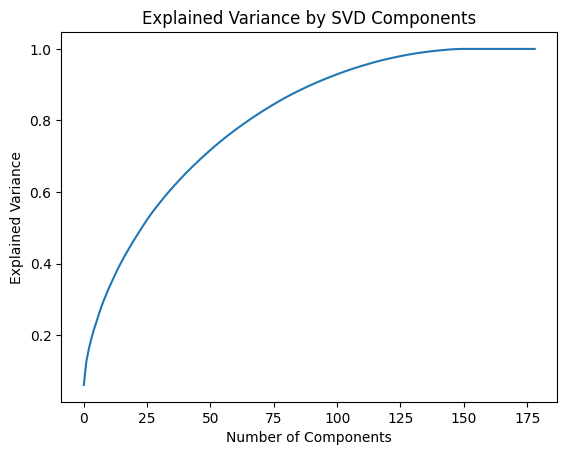

In [ ]:
# Optional: Plot feature importance for SVD, since we reduce dimensions, we might want to see the numbers of dimensions for us
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by SVD Components')
plt.show()

# Model Training

Here we can select many different classification model to train. Candiates:
1) Logistic regression
2) Naive Bayes
3) Support Vector Machine

Start with these, or you can choose a different one

In [ ]:
# 5️⃣A Train Logistic Regression Model for the reduced
# Train-Test Split, 80% train 20% test
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_reduced, df['label'], test_size=0.2, random_state=100)
model_r = LogisticRegression()
model_r.fit(X_r_train, y_r_train)


LogisticRegression()

In [ ]:
# 5️⃣B Train Logistic Regression Model original to compare
# Train-Test Split, 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Evaluate Model

In [ ]:
# 6️⃣A Evaluate the Model
y_r_pred = model_r.predict(X_r_test)
accuracy = accuracy_score(y_r_test, y_r_pred)
cm_r = confusion_matrix(y_r_test, y_r_pred) #confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_r_test, y_r_pred))
print("\nConfusion Matrix:\n", cm_r )

Accuracy: 0.9444

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.88      0.93        16

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
 [[20  0]
 [ 2 14]]


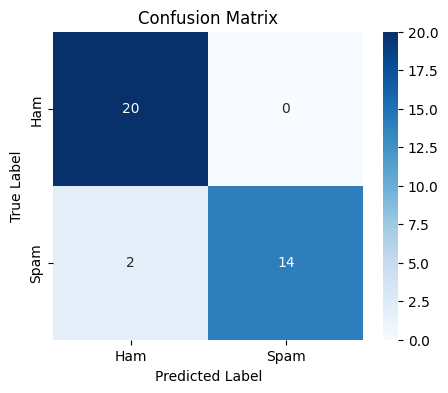

In [ ]:
#Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_r, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 6️⃣B Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) #confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.9444

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.88      0.93        16

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
 [[20  0]
 [ 2 14]]


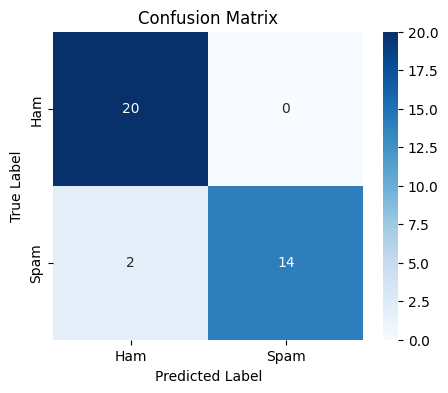

In [ ]:
#Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#Epilogue

### which pipeline should we choose? one with no feature engineer or one with feature engineer?

### How do you think our model does with this dataset?
https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification/data

When you use the model outside of the original data to a new data --> we perform inferencing.


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
# 6️⃣B Evaluate the Model
y_nb_pred = model.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_nb_pred)
cm_nb = confusion_matrix(y_test, y_nb_pred) #confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_nb_pred))
print("\nConfusion Matrix:\n", cm_nb)

Accuracy: 0.9444

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.88      0.93        16

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
 [[20  0]
 [ 2 14]]
